<a href="https://colab.research.google.com/github/wooookim/ML-DL/blob/main/9_2_%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

print(wine.head())

   alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0


0.7808350971714451
0.7776923076923077
0.996921300750433
0.8592307692307692
0.8454877814123533
0.8415384615384616


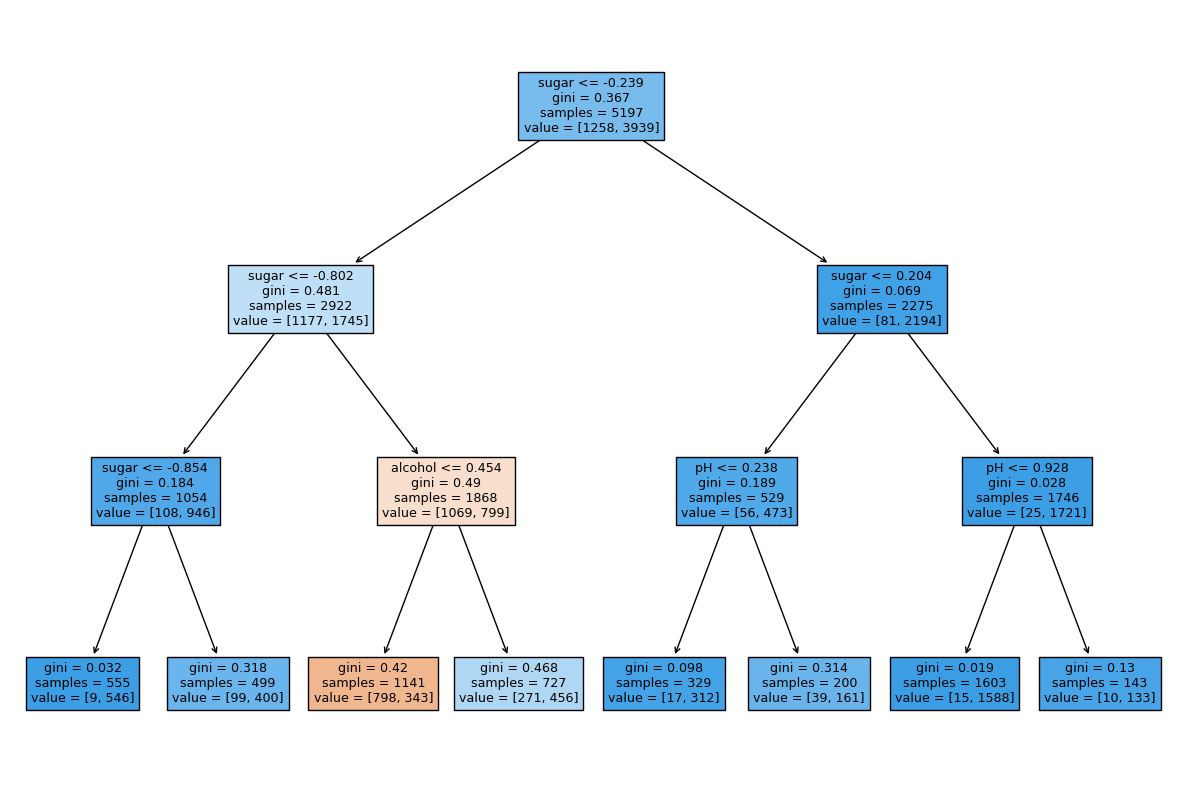

0.8454877814123533
0.8415384615384616


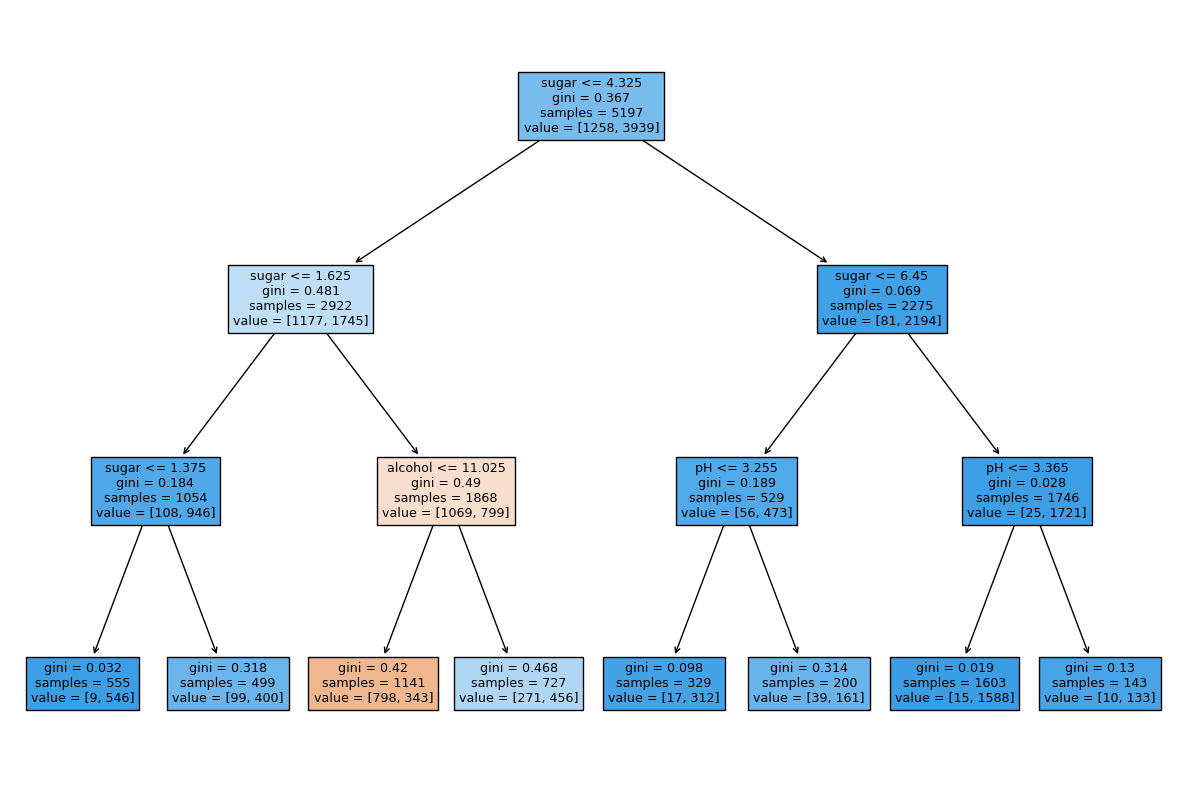

[0.12345626 0.86862934 0.0079144 ]


In [17]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2, random_state = 42)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))


'''
결정트리
- 왼쪽이 Y, 오른쪽은 N

지니 불순도(gini impurity)
- DecisionTreeClassifier 클래스의 criteriion 매개변수 기본값
=> 1 - {(음성클래스 비율^2) + (양성클래스 비율^2)}

결정트리 모델은 부모노드와 자식 노드의 불순도 차이가 가능한 크도록 트리를 성장시킴
=> (부모의 불순도) - [{(왼쪽 노드 샘플수)/(부모 샘플 수)}*(왼쪽 노드 불순도)] - [{(오른쪽 노드 샘플수)/(부모 샘플 수)}*(오른쪽 노드 불순도)]

정보이득
- 부모-자식 간불순도 차이

비율로 분류하기 때문에 전처리 필요 없음
- 음수가 나오지 않는 실제값
'''
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# plt.figure(figsize = (10, 7))
# plot_tree(dt)
# plt.show()

# plt.figure(figsize = (10, 7))
# plot_tree(dt, max_depth = 1, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
# plt.show()

dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

plt.figure(figsize = (15, 10))
plot_tree(dt, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

plt.figure(figsize = (15, 10))
plot_tree(dt, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

print(dt.feature_importances_)  # 특성 중요도 비율

0.8874350586877044
0.8615384615384616


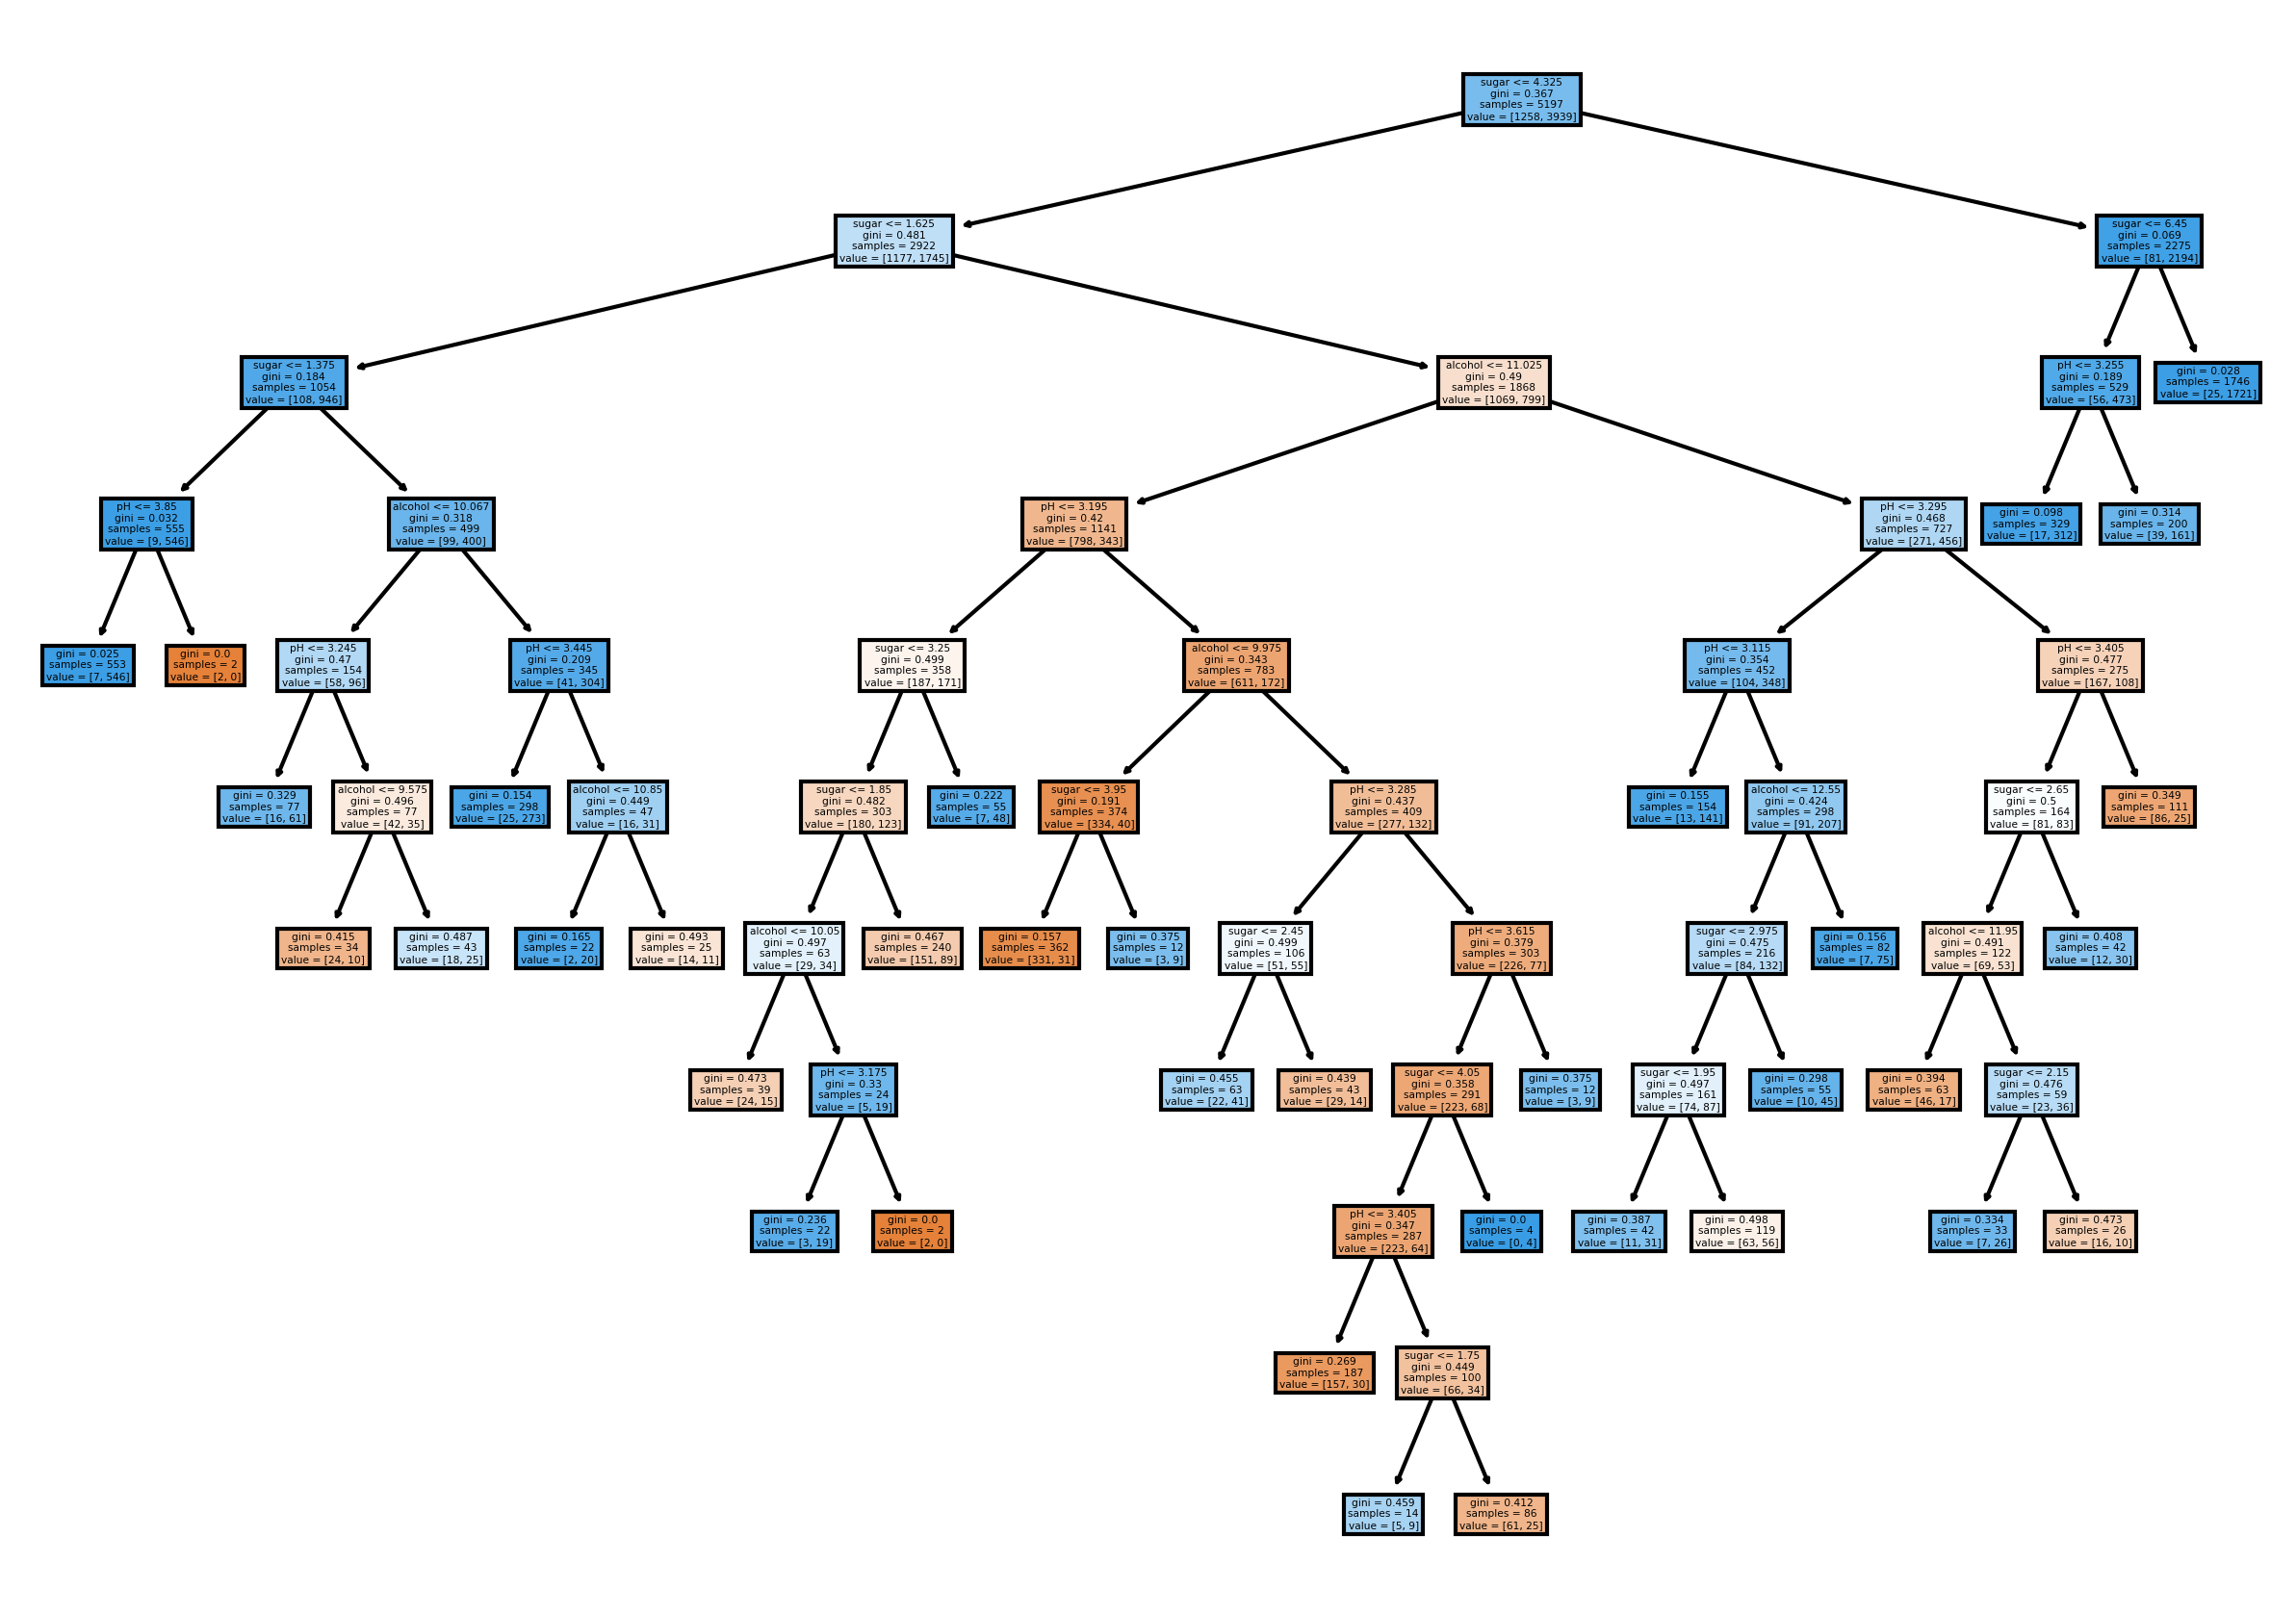

In [21]:
dt = DecisionTreeClassifier(min_impurity_decrease = 0.0005, random_state = 42)   # min_impurity_decrease = 0.0005 매개변수보다 작으면 더이상 분할하지 않음 -> 가지치기
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))
plt.figure(figsize = (10, 7), dpi = 300)
plot_tree(dt, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()